In [21]:
import pandas as pd

In [22]:
import numpy as np

In [23]:
import seaborn as sns

In [27]:
data = pd.read_csv(r'C:\Users\reeve\Documents\insurance.csv')

In [ ]:
# understanding the data

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [30]:
#cheking the shape

In [31]:
data.shape

(1338, 7)

In [32]:
#cheking datatypes of each collumns

In [33]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [34]:
#cheking the missing values

In [35]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
#summary of numerical attributes

In [37]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
#unique values

In [39]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [40]:
#relationship analysis

In [41]:
 #Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

In [42]:
sns.set(style="whitegrid")

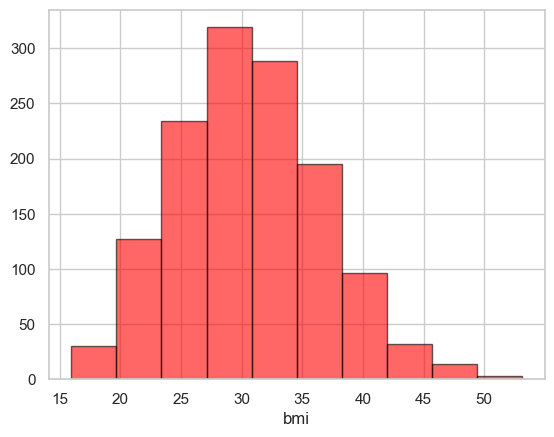

C:\Users\reeve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

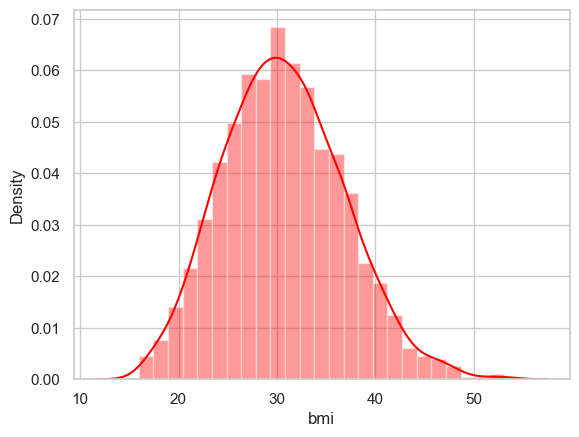

In [48]:
#ploting histogram and dist plot of bmi
plt.hist(data['bmi'], color= 'red', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(data['bmi'], color= 'red')

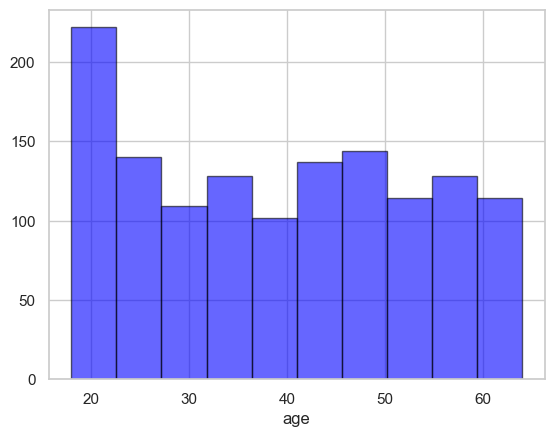

C:\Users\reeve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

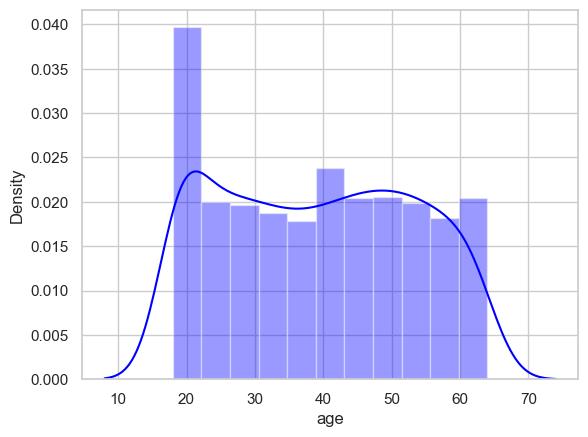

In [49]:
#plotting the histogram and dist plot of age
plt.hist(data['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(data['age'], color= 'blue')

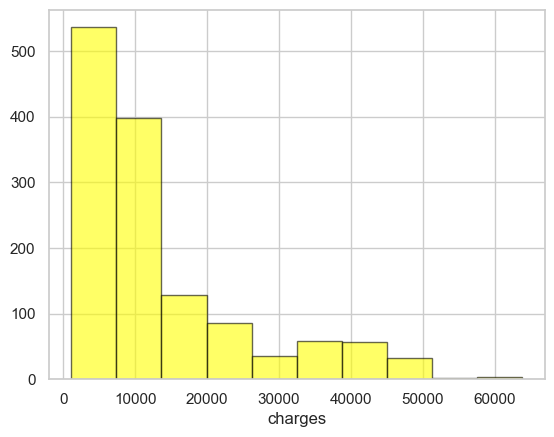

C:\Users\reeve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

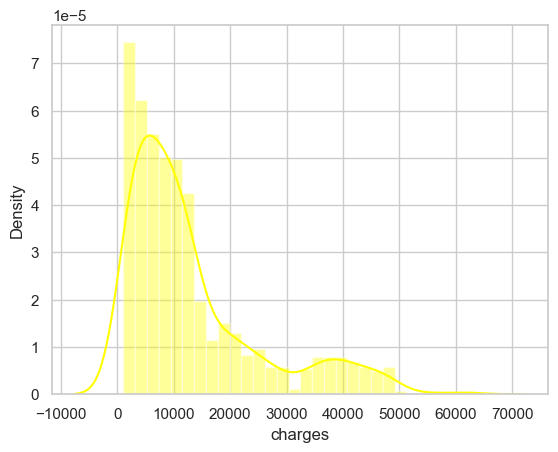

In [50]:
#ploting histogram and dist plot of 'charages' column
plt.hist(data['charges'], color= 'yellow', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges')
plt.show()

sns.distplot(data['charges'], color= 'yellow')

In [51]:
# measuring the of ‘bmi’, ‘age’ and ‘charges’ columns and storing to new dataframe

In [53]:
Skew = pd.DataFrame({'Skewness Value' : [stats.skew(data.bmi), stats.skew(data.age),stats.skew(data.charges)]},
                    index=['bmi','age','charges'])
Skew

,Skewness Value
bmi,0.283729
age,0.055610
charges,1.514180


In [54]:
#Checking the presence of outliers

C:\Users\reeve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

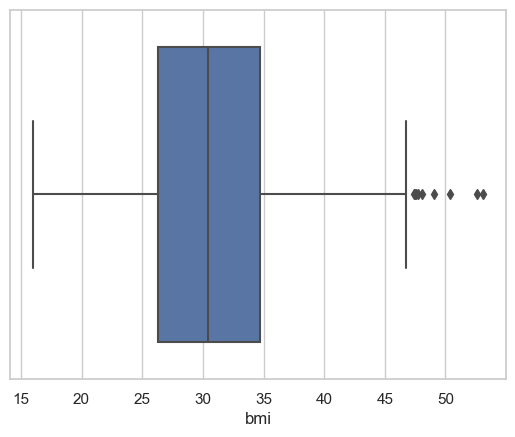

In [55]:
# plotting Box Plot for Column 'bmi'
sns.boxplot(data['bmi'])

In [57]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile( data['bmi'], 25)
Q3 = np.percentile(data['bmi'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
bmi_out = [x for x in data['bmi'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for bmi:', len(bmi_out))

Identified outliers for bmi: 9


C:\Users\reeve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

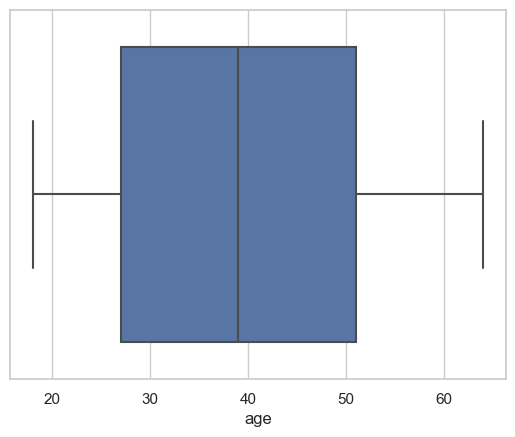

In [58]:
# plotting Box Plot for Column 'age'
sns.boxplot(data['age'])

In [59]:
#Identifying the presence of outliers in "bmi" column.
Q1 = np.percentile(data['age'], 25)
Q3 = np.percentile(data['age'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
age_out = [x for x in data['age'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for age:', len(age_out))

Identified outliers for age: 0


C:\Users\reeve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

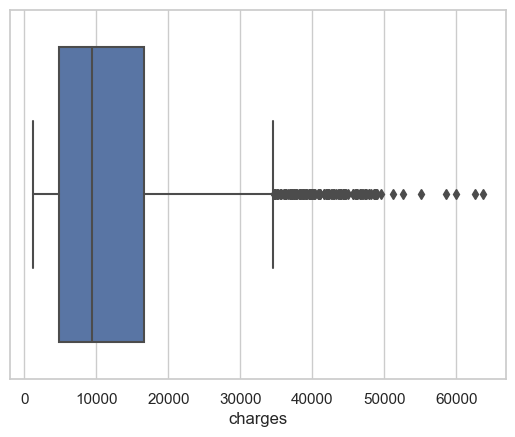

In [60]:
# plotting Box Plot for Column 'charges'
sns.boxplot(data['charges'])

In [61]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile(data['charges'], 25)
Q3 = np.percentile(data['charges'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
charges_out = [x for x in data['charges'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for charges:', len(charges_out))

Identified outliers for charges: 139


C:\Users\reeve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

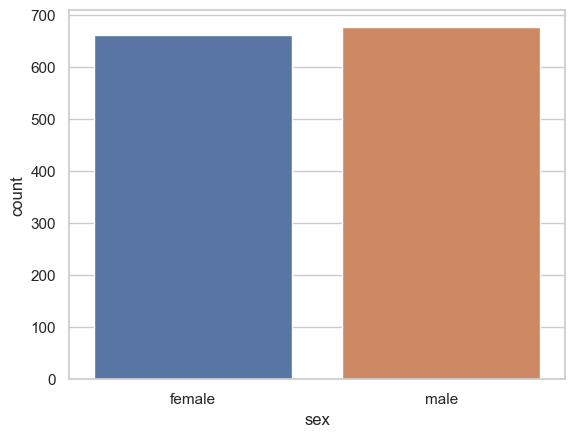

In [62]:
# plotting Count Plot for Column 'sex'
sns.countplot(data['sex'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

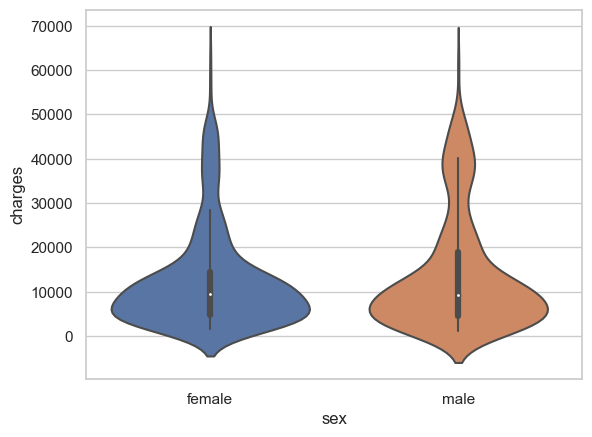

In [63]:
# plotting violin Plot for Column 'sex'
sns.violinplot(y='charges', x='sex', data=data, split=True)

C:\Users\reeve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

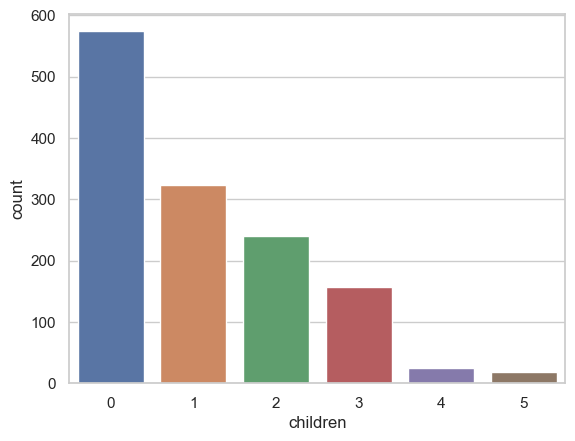

In [64]:
# plotting Count Plot for Column 'children'
sns.countplot(data['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

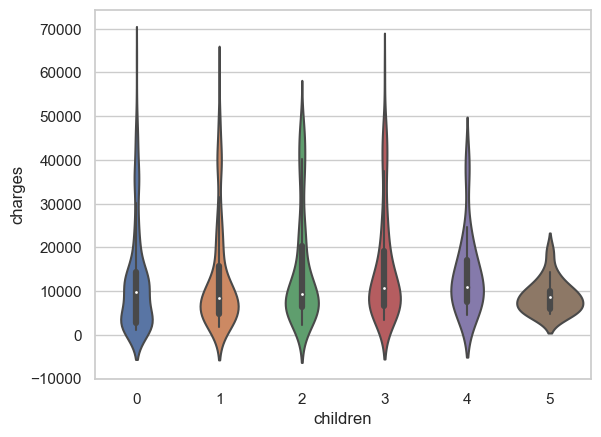

In [65]:
# plotting violin Plot for Column 'children'
sns.violinplot(y='charges', x='children', data=data, split=True)

C:\Users\reeve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

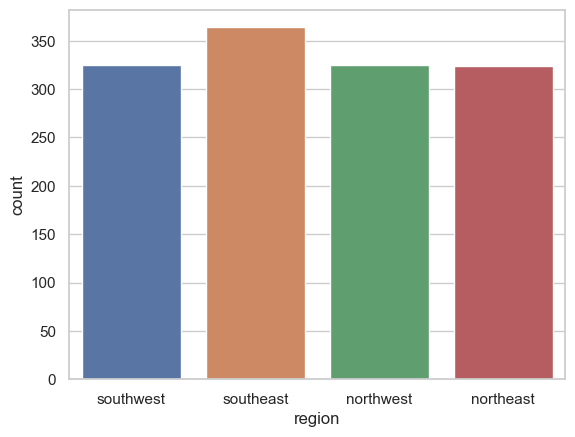

In [66]:
# plotting Count Plot for Column 'region'
sns.countplot(data['region'])

<AxesSubplot:xlabel='region', ylabel='charges'>

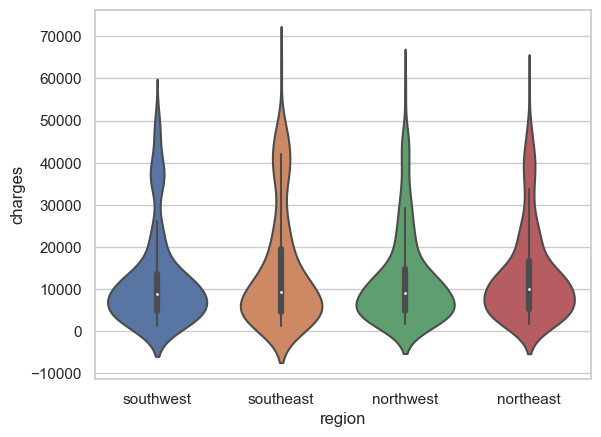

In [67]:
# plotting violin Plot for Column 'region'
sns.violinplot(y='charges', x='region', data=data, split=True)

In [68]:
#Pair plot including all the columns of the data frame.

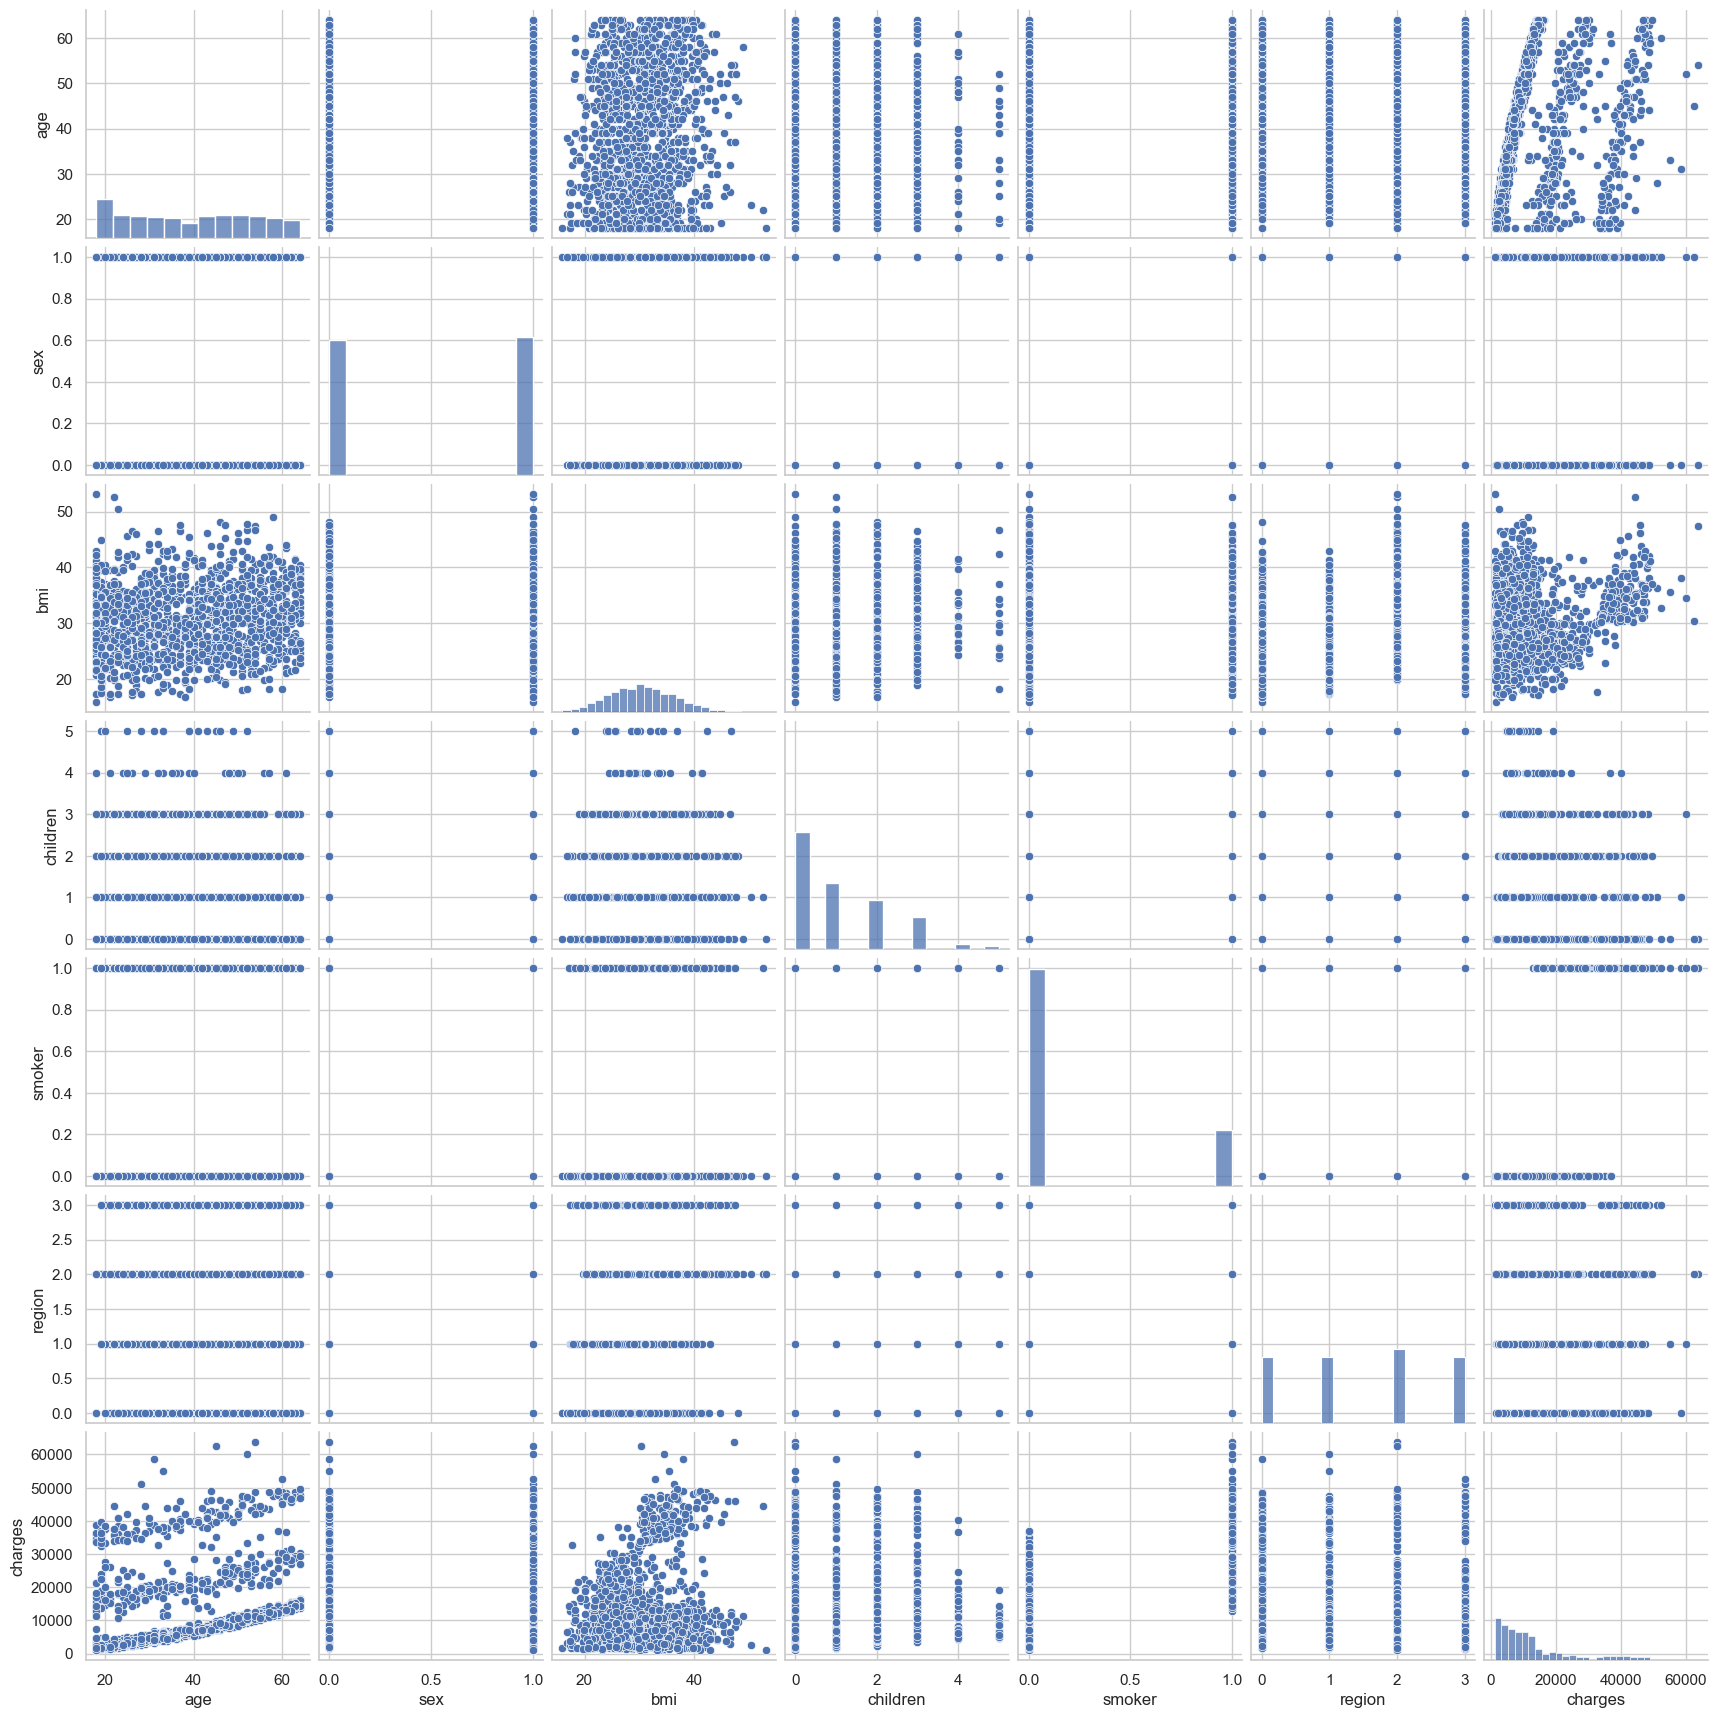

In [69]:
# creating copy of original data set
data_copy = data.copy()

# using label encoding to convert string values because pair plot ignores string values
data_copy.loc[:,['sex', 'smoker', 'region']] = data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

# plotting pair plot for dataframe
sns.pairplot(data_copy)
plt.show()